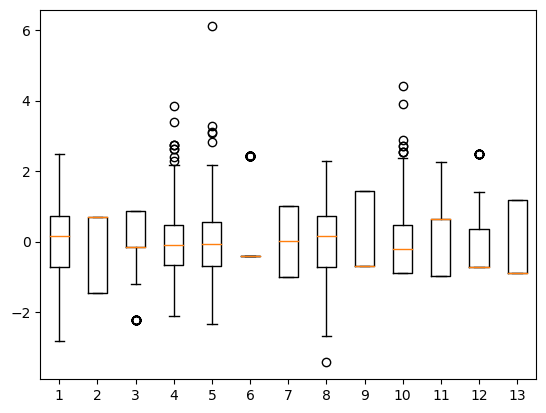

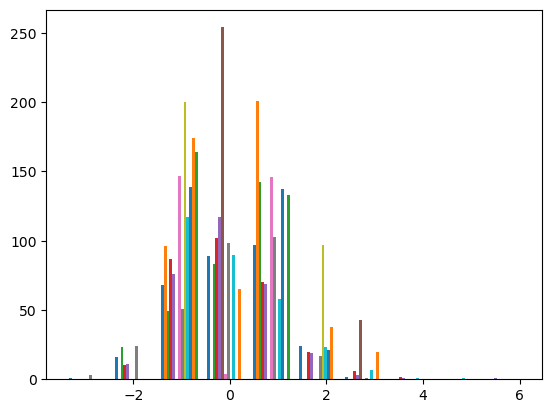

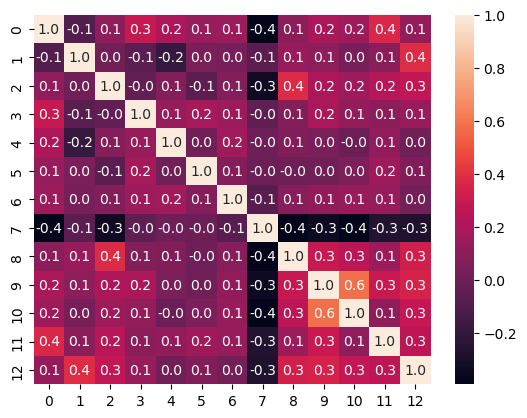

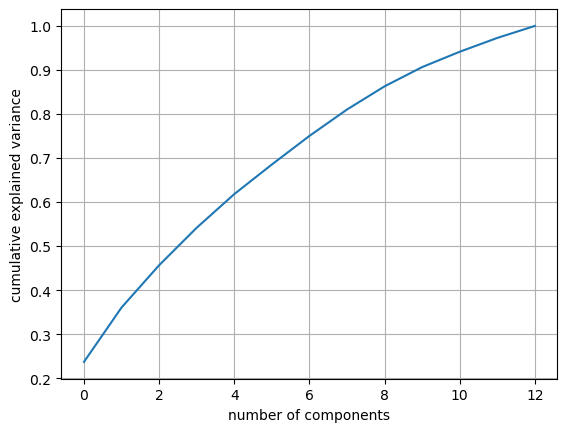

Eigenvalues :  [3.09076392 1.61085694 1.25271584 1.11083842 0.35543623 0.40964027
 0.45476341 0.56982305 0.99631063 0.68723643 0.78191079 0.87658287
 0.84704013]
Eigenvectors :  [[ 0.28586758  0.41866153 -0.01261961  0.12419567  0.03123119 -0.60490431
  -0.01953097 -0.12518455  0.33301471 -0.25119348  0.32869113 -0.13706318
   0.20894989]
 [ 0.11680189 -0.431579    0.48369265  0.2554797   0.15025525 -0.02300399
  -0.53895838  0.01019962 -0.22056993 -0.24877202  0.13528374 -0.12415037
   0.20719272]
 [ 0.28621211 -0.15253955 -0.40887336  0.32658925  0.06591852 -0.12953711
  -0.34113269 -0.4428583  -0.03559127  0.44845459 -0.03321693  0.10476835
  -0.2699967 ]
 [ 0.16784082  0.39151404  0.31463151 -0.18685395  0.11444853  0.26132766
  -0.17185439  0.03297055 -0.08463981  0.36336173  0.432931    0.4907731
   0.07172239]
 [ 0.08350419  0.42820138 -0.2600399   0.19084194  0.02741043  0.14275303
  -0.18867857 -0.04219898 -0.40076951 -0.4200732  -0.41035697  0.29293212
   0.23630352]
 [ 0.076

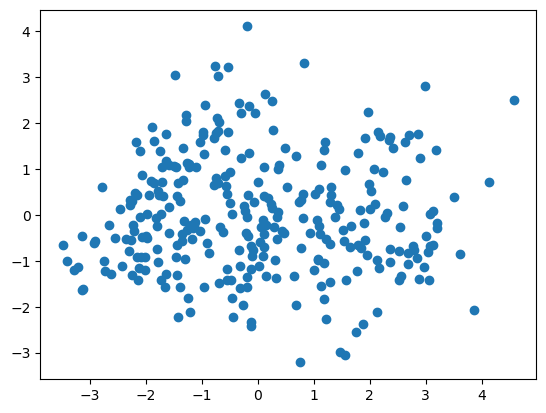

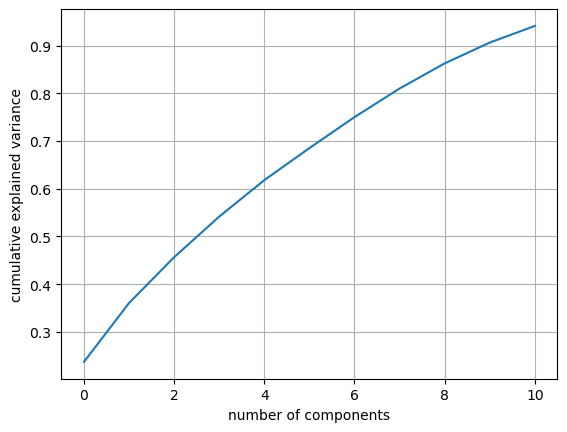

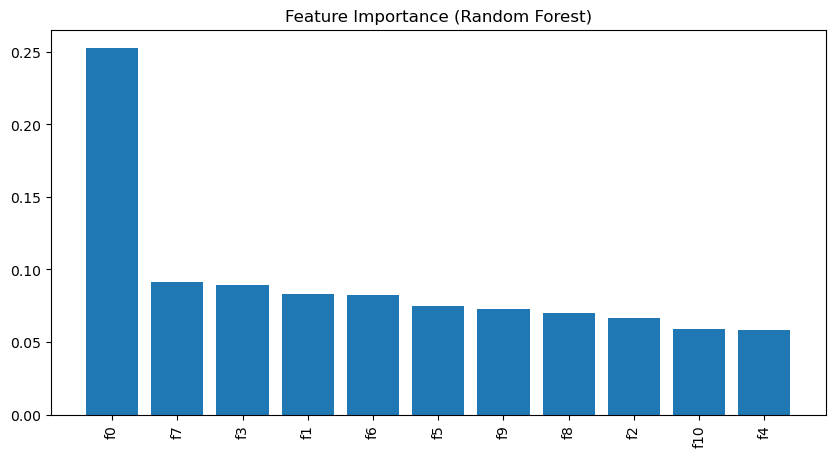

Selected Features :  [ True False False False False False  True False False False False]


In [1]:
from importlib import import_module
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from dask.array import average
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, \
    RocCurveDisplay, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
import pickle

from importlib import import_module
import importnb

with importnb.Notebook():
        # Import the notebook as a module
        dataPreprocessing = import_module("01_data_preprocessing")
        pcaAnalysis = import_module("02_pca_analysis")
        featureSelection = import_module("03_feature_selection")

In [2]:
finalDataset = pcaAnalysis.X_reduced[: , featureSelection.rfe.get_support()]


X, X_test, y,  y_test = train_test_split(finalDataset , dataPreprocessing.label ,train_size= 0.8, random_state=42)

scorers = {
    'precision_score': make_scorer(precision_score,average="micro"),
    'recall_score': make_scorer(recall_score,average="micro"),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score,average="micro")
}

In [3]:
lr_model = LogisticRegression()
lr_param = {
    "solver" : ['lbfgs', "newton-cg", "newton-cholesky" ],
    "penalty" : ["l1", "l2", "elasticnet", "None"],
    "max_iter" : [100,150,200]
}
gridSearch = GridSearchCV(estimator=lr_model,param_grid=lr_param,scoring=scorers,refit="accuracy_score",cv=5)
gridSearch.fit(X, y)
print("---------- Logistic Regression Results ------------")
print(f"Best parameters found: {gridSearch.best_params_}")
print(f"Best cross-validation accuracy: {gridSearch.best_score_:.4f}")
best_model = gridSearch.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")

---------- Logistic Regression Results ------------
Best parameters found: {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.5865
Test set accuracy with best model: 0.6333


C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueEr

In [4]:
dt_model = DecisionTreeClassifier()
dt_param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [5,10,15,20],
    "min_samples_split" : [2,4,6,8,10]
}
gridSearch = GridSearchCV(estimator=dt_model,param_grid=dt_param,scoring=scorers,refit="accuracy_score",cv=5)
gridSearch.fit(X, y)
print("---------- Decision Tree Results ------------")
print(f"Best parameters found: {gridSearch.best_params_}")
print(f"Best cross-validation accuracy: {gridSearch.best_score_:.4f}")
best_model = gridSearch.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")

---------- Decision Tree Results ------------
Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.6203
Test set accuracy with best model: 0.6167


In [5]:
rf_model = RandomForestClassifier()
rf_param = {
    "n_estimators" : [100,150,200],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [5,10,15,20],
    "min_samples_split" : [2,4,6,8,10]
}
gridSearch = GridSearchCV(estimator=rf_model,param_grid=rf_param,scoring=scorers,refit="accuracy_score",cv=5)
gridSearch.fit(X, y)
print("---------- Random Forest Results ------------")
print(f"Best parameters found: {gridSearch.best_params_}")
print(f"Best cross-validation accuracy: {gridSearch.best_score_:.4f}")
best_model = gridSearch.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")

---------- Random Forest Results ------------
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 200}
Best cross-validation accuracy: 0.6115
Test set accuracy with best model: 0.5833


In [6]:
svm_model = SVC()
svm_param = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "shrinking" : [True, False],
    "max_iter" : [-1, 5, 10, 15, 20]
}
gridSearch = GridSearchCV(estimator=svm_model,param_grid=svm_param,scoring=scorers,refit="accuracy_score",cv=5)
gridSearch.fit(X, y)
print("---------- Support Vector Machine Results ------------")
print(f"Best parameters found: {gridSearch.best_params_}")
print(f"Best cross-validation accuracy: {gridSearch.best_score_:.4f}")
best_model = gridSearch.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")
#Saving the model in pkl format
with open('../models/SupportVectorMachineModel.pkl', 'wb') as file:
    pickle.dump(best_model, file)

C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5).

---------- Support Vector Machine Results ------------
Best parameters found: {'kernel': 'linear', 'max_iter': -1, 'shrinking': True}
Best cross-validation accuracy: 0.5949
Test set accuracy with best model: 0.6500


C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Mahmoud\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
